In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)
import time

In [2]:
train_raw = pd.read_csv('data/train_V2.csv')
test_raw = pd.read_csv('data/test_V2.csv')

# 1. Basic Statistics

In [3]:
print("training set size: {}, testing set size: {}, feature size: {}".format(train_raw.values.shape[0],test_raw.values.shape[0],test_raw.values.shape[1]))

training set size: 4446966, testing set size: 1934174, feature size: 28


#### Feature labels

In [4]:
list(test_raw)

['Id',
 'groupId',
 'matchId',
 'assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'matchType',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints']

#### Win place percentage (the probability of winning)

In [5]:
wpp_count,wpp_div = np.histogram(train_raw['winPlacePerc']*100,bins=101,range=(0, 101))
print(list(zip(wpp_div,wpp_count)))

[(0.0, 220505), (1.0, 7808), (2.0, 37815), (3.0, 101079), (4.0, 53222), (5.0, 8312), (6.0, 52929), (7.0, 80184), (8.0, 48119), (9.0, 11873), (10.0, 66548), (11.0, 59998), (12.0, 40639), (13.0, 33082), (14.0, 71118), (15.0, 38212), (16.0, 36804), (17.0, 52973), (18.0, 46126), (19.0, 39758), (20.0, 50448), (21.0, 40382), (22.0, 47821), (23.0, 43910), (24.0, 30917), (25.0, 71192), (26.0, 42665), (27.0, 34115), (28.0, 46096), (29.0, 50217), (30.0, 39652), (31.0, 36195), (32.0, 43511), (33.0, 45071), (34.0, 52322), (35.0, 36749), (36.0, 36209), (37.0, 50948), (38.0, 37829), (39.0, 36088), (40.0, 55463), (41.0, 32607), (42.0, 53076), (43.0, 25318), (44.0, 56335), (45.0, 24962), (46.0, 55892), (47.0, 21872), (48.0, 56479), (49.0, 3635), (50.0, 58695), (51.0, 48149), (52.0, 29186), (53.0, 54335), (54.0, 23832), (55.0, 46632), (56.0, 31524), (57.0, 49756), (58.0, 30086), (59.0, 35827), (60.0, 48610), (61.0, 34937), (62.0, 46401), (63.0, 25429), (64.0, 40660), (65.0, 47637), (66.0, 40568), (67.0

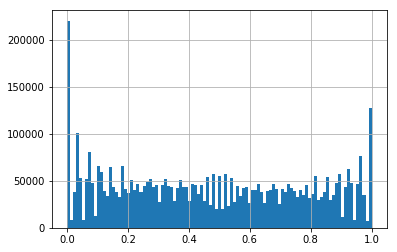

In [6]:
hist_wpp = train_raw['winPlacePerc'].hist(bins=101)
fig=hist_wpp.get_figure()
fig.savefig('dis-winPlacePerc.png')

#### Kills (number of kills in one game)

In [7]:
kill_count,kill_div = np.histogram(train_raw['kills'],bins=train_raw['kills'].max()-train_raw['kills'].min())
print(list(zip(kill_div,kill_count)))

[(0.0, 2529722), (1.0, 928079), (2.0, 472466), (3.0, 232441), (4.0, 124543), (5.0, 66577), (6.0, 37960), (7.0, 21816), (8.0, 12779), (9.0, 7644), (10.0, 4599), (11.0, 2799), (12.0, 1755), (13.0, 1137), (14.0, 757), (15.0, 484), (16.0, 325), (17.0, 234), (18.0, 165), (19.0, 112), (20.0, 109), (21.0, 70), (22.0, 77), (23.0, 47), (24.0, 44), (25.0, 27), (26.0, 27), (27.0, 21), (28.0, 22), (29.0, 13), (30.0, 13), (31.0, 13), (32.0, 4), (33.0, 12), (34.0, 5), (35.0, 7), (36.0, 8), (37.0, 5), (38.0, 7), (39.0, 4), (40.0, 4), (41.0, 5), (42.0, 3), (43.0, 3), (44.0, 2), (45.0, 1), (46.0, 2), (47.0, 1), (48.0, 1), (49.0, 1), (50.0, 1), (51.0, 0), (52.0, 0), (53.0, 4), (54.0, 0), (55.0, 2), (56.0, 2), (57.0, 2), (58.0, 0), (59.0, 0), (60.0, 0), (61.0, 0), (62.0, 0), (63.0, 0), (64.0, 0), (65.0, 1), (66.0, 1), (67.0, 0), (68.0, 0), (69.0, 0), (70.0, 0), (71.0, 1)]


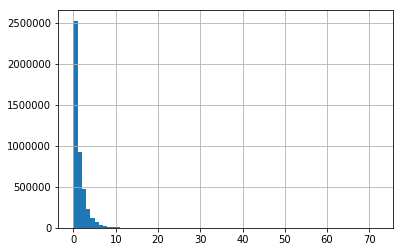

In [8]:
hist_kills = train_raw['kills'].hist(bins=train_raw['kills'].max()-train_raw['kills'].min())
fig=hist_kills.get_figure()
fig.savefig('dis-kills.png')

#### longest kill

In [9]:
wpp_count,wpp_div = np.histogram(train_raw['longestKill'],bins=101)
print(list(zip(wpp_div,wpp_count)))

[(0.0, 3008258), (10.831683168316832, 335858), (21.663366336633665, 226832), (32.4950495049505, 155691), (43.32673267326733, 113665), (54.15841584158416, 89074), (64.990099009901, 74536), (75.82178217821783, 63335), (86.65346534653466, 53160), (97.48514851485149, 45014), (108.31683168316832, 37778), (119.14851485148516, 32314), (129.980198019802, 27422), (140.81188118811883, 23441), (151.64356435643566, 20666), (162.4752475247525, 18761), (173.30693069306932, 16968), (184.13861386138615, 14615), (194.97029702970298, 12883), (205.8019801980198, 11125), (216.63366336633663, 9380), (227.4653465346535, 8137), (238.29702970297032, 6801), (249.12871287128715, 5828), (259.960396039604, 4986), (270.79207920792084, 4358), (281.62376237623766, 3670), (292.4554455445545, 3172), (303.2871287128713, 2709), (314.11881188118815, 2264), (324.950495049505, 1948), (335.7821782178218, 1779), (346.61386138613864, 1387), (357.44554455445547, 1284), (368.2772277227723, 972), (379.1089108910891, 885), (389.9

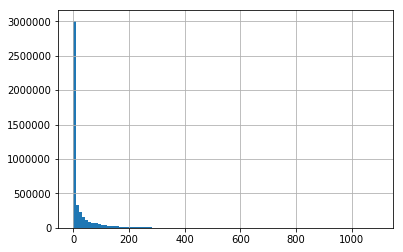

In [10]:
hist_longests = train_raw['longestKill'].hist(bins=101)
fig=hist_longests.get_figure()
fig.savefig('dis-longest.png')

#### Assists (number of helping team member kills in one game)

In [11]:
assist_count,assist_div = np.histogram(train_raw['assists'],bins=train_raw['assists'].max()-train_raw['assists'].min())
print(list(zip(assist_div,assist_count)))

[(0.0, 3667660), (1.0, 591883), (2.0, 137144), (3.0, 35640), (4.0, 9990), (5.0, 2892), (6.0, 976), (7.0, 387), (8.0, 185), (9.0, 84), (10.0, 48), (11.0, 27), (12.0, 20), (13.0, 16), (14.0, 2), (15.0, 7), (16.0, 0), (17.0, 2), (18.0, 0), (19.0, 0), (20.0, 1), (21.0, 2)]


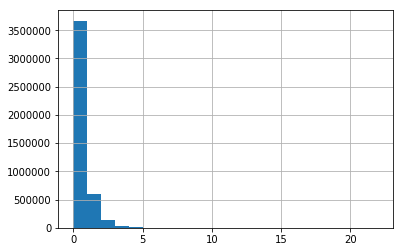

In [12]:
hist_assist = train_raw['assists'].hist(bins=train_raw['assists'].max()-train_raw['assists'].min())
fig=hist_assist.get_figure()
fig.savefig('dis-assists.png')

#### DBNOs (number of knocking down ememies)

In [13]:
DBNOs_count,DBNOs_div = np.histogram(train_raw['DBNOs'],bins=train_raw['DBNOs'].max()-train_raw['DBNOs'].min())
print(list(zip(DBNOs_div,DBNOs_count)))

[(0.0, 2773735), (1.0, 983281), (2.0, 395119), (3.0, 162682), (4.0, 69307), (5.0, 31686), (6.0, 14977), (7.0, 7291), (8.0, 3694), (9.0, 1966), (10.0, 1110), (11.0, 643), (12.0, 466), (13.0, 275), (14.0, 177), (15.0, 137), (16.0, 87), (17.0, 80), (18.0, 64), (19.0, 34), (20.0, 30), (21.0, 26), (22.0, 18), (23.0, 14), (24.0, 10), (25.0, 16), (26.0, 11), (27.0, 6), (28.0, 3), (29.0, 1), (30.0, 1), (31.0, 3), (32.0, 3), (33.0, 7), (34.0, 0), (35.0, 1), (36.0, 0), (37.0, 0), (38.0, 1), (39.0, 2), (40.0, 1), (41.0, 0), (42.0, 0), (43.0, 0), (44.0, 0), (45.0, 0), (46.0, 0), (47.0, 0), (48.0, 0), (49.0, 0), (50.0, 0), (51.0, 0), (52.0, 1)]


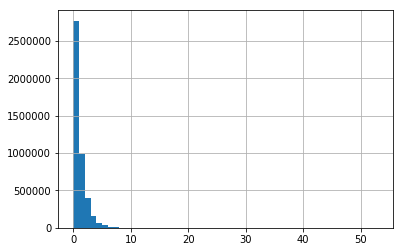

In [14]:
hist_DBNOs = train_raw['DBNOs'].hist(bins=train_raw['DBNOs'].max()-train_raw['DBNOs'].min())
fig=hist_DBNOs.get_figure()
fig.savefig('dis-DBNOs.png')

#### drop abnormal rows (kill > 30, DBNO > 40, longestkill > 1000)

In [15]:
train_raw.drop(train_raw[train_raw['kills'] > 30].index, inplace=True)
train_raw.drop(train_raw[train_raw['DBNOs'] > 40].index, inplace=True)
train_raw.drop(train_raw[train_raw['longestKill'] > 1000].index, inplace=True)

In [16]:
train_raw.drop(train_raw[train_raw['winPlacePerc'].isnull()].index, inplace=True)

In [17]:
# to see the result
kill_count,kill_div = np.histogram(train_raw['kills'],bins=train_raw['kills'].max()-train_raw['kills'].min())
print(list(zip(kill_div,kill_count)))

[(0.0, 2529721), (1.0, 928077), (2.0, 472466), (3.0, 232440), (4.0, 124542), (5.0, 66576), (6.0, 37958), (7.0, 21816), (8.0, 12778), (9.0, 7644), (10.0, 4596), (11.0, 2797), (12.0, 1755), (13.0, 1135), (14.0, 756), (15.0, 483), (16.0, 324), (17.0, 234), (18.0, 165), (19.0, 112), (20.0, 108), (21.0, 70), (22.0, 76), (23.0, 46), (24.0, 44), (25.0, 27), (26.0, 27), (27.0, 21), (28.0, 22), (29.0, 26)]


#### Info of different matchTypes

In [18]:
group_names = train_raw['matchType'].unique()
groups = train_raw.groupby(by='matchType')
squadfpp_gp = groups.get_group('squad-fpp')
duo_gp = groups.get_group('duo')
solofpp_gp = groups.get_group('solo-fpp')
squad_gp = groups.get_group('squad')
duofpp_gp = groups.get_group('duo-fpp')
normalsquadfpp_gp = groups.get_group('normal-squad-fpp')
solo_gp = groups.get_group('solo')
crashfpp_gp = groups.get_group('crashfpp')
flaretpp_gp = groups.get_group('flaretpp')
normalsolofpp_gp = groups.get_group('normal-solo-fpp')
flarefpp_gp = groups.get_group('flarefpp')
normalduofpp_gp = groups.get_group('normal-duo-fpp')
normalduo_gp = groups.get_group('normal-duo')
normalsquad_gp = groups.get_group('normal-squad')
crashtpp_gp = groups.get_group('crashtpp')
normalsolo_gp = groups.get_group('normal-solo')
print("Group by matchType:")
for name in group_names:
    tmp_df = groups.get_group(name)
    print("size of {}: {}".format(name, tmp_df.values.shape[0]))
match_types={}
match_types['squad-fpp']=squadfpp_gp
match_types['duo']=duo_gp
match_types['solo-fpp']=solofpp_gp
match_types['squad']=squad_gp
match_types['duo-fpp']=duofpp_gp
match_types['normal-squad-fpp']=normalsquadfpp_gp
match_types['solo']=solo_gp
match_types['crashfpp']=crashfpp_gp
match_types['flaretpp']=flaretpp_gp
match_types['normal-solo-fpp']=normalsolofpp_gp
match_types['flarefpp']=flarefpp_gp
match_types['normal-duo-fpp']=normalduofpp_gp
match_types['normal-duo']=normalduo_gp
match_types['normal-squad']=normalsquad_gp
match_types['crashtpp']=crashtpp_gp
match_types['normal-solo']=normalsolo_gp

Group by matchType:
size of squad-fpp: 1756186
size of duo: 313590
size of solo-fpp: 536761
size of squad: 626525
size of duo-fpp: 996691
size of solo: 181942
size of normal-squad-fpp: 17125
size of crashfpp: 6287
size of flaretpp: 2505
size of normal-solo-fpp: 1637
size of flarefpp: 718
size of normal-duo-fpp: 5475
size of normal-duo: 198
size of normal-squad: 510
size of crashtpp: 371
size of normal-solo: 321


# 2. Feature Selection

calculate the correlation matrix between features, and remove the features that correlation greater than 0.9 and less than -0.9

In [19]:
features = list(train_raw)
features.remove('matchType')
features=features[3:-1]
train = train_raw[features]
corr = train.corr()

In [ ]:
plt.subplots(figsize=(20,15))
f=sns.heatmap(corr,center=0,vmin=-1,vmax=1)
fig=f.get_figure()
fig.savefig('correlation.png')

In [ ]:
colums_used=[True]*len(features)
for i in range(corr.shape[0]):
    for j in range(i+1,corr.shape[0]):
        if corr.iloc[i][j]>=0.9 or corr.iloc[i,j]<-0.9:
            if colums_used[j]:
                colums_used[j]=False
                
colums_used.insert(12,False) # add back match type
colums_used=[False,False,False]+colums_used+[True]
selected=train_raw.columns[np.array(colums_used)]
print('selected :',selected)
print('removed :',train_raw.columns[np.array([(not t) for t in colums_used])])
train=train_raw[selected]
test=test_raw[test_raw.columns[np.array(colums_used[:-1])]]

# 3. Group by matchType

In PUBG, there are different type of games(SOLOs,DUOs,SQUADs), and they should be considered separately.

In [ ]:
from sklearn.linear_model import LinearRegression
import copy

In [ ]:
eps=1e-10
models={}
stats={}
for k,v in match_types.items():
    print('solving match type:',k)
    a=v[selected].as_matrix()
    X=a[:,:-1]
    y=a[:,-1]
    feat_mean=np.mean(X,axis=0)
    feat_std=np.std(X,axis=0)
    stats[k]=(feat_mean,feat_std)
    X=(X-feat_mean)/(feat_std+eps)
    reg = LinearRegression().fit(X, y)
    models[k]=copy.copy(reg)
    theta=reg.coef_
    print('theta =',theta)
    

In [ ]:
a=models['squad'].coef_
ind=np.arange(a.shape[0])
plt.subplots(figsize=(10,10))
plt.title('feature importance in squad games')
plt.xticks(ind, selected, rotation='vertical')
_=plt.bar(ind,a)
plt.savefig('featImpo-squad.png')

In [ ]:
a=models['solo'].coef_
ind=np.arange(a.shape[0])
plt.subplots(figsize=(10,10))
plt.title('feature importance in solo games')
plt.xticks(ind, selected, rotation='vertical')
_=plt.bar(ind,a)
plt.savefig('featImpo-solo.png')

# 4. Final Prediction

In [ ]:
te_group_names = test_raw['matchType'].unique()
te_groups = test_raw.groupby(by='matchType')
te_squadfpp_gp = te_groups.get_group('squad-fpp')
te_duo_gp = te_groups.get_group('duo')
te_solofpp_gp = te_groups.get_group('solo-fpp')
te_squad_gp = te_groups.get_group('squad')
te_duofpp_gp = te_groups.get_group('duo-fpp')
te_normalsquadfpp_gp = te_groups.get_group('normal-squad-fpp')
te_solo_gp = te_groups.get_group('solo')
te_crashfpp_gp = te_groups.get_group('crashfpp')
te_flaretpp_gp = te_groups.get_group('flaretpp')
te_normalsolofpp_gp = te_groups.get_group('normal-solo-fpp')
te_flarefpp_gp = te_groups.get_group('flarefpp')
te_normalduofpp_gp = te_groups.get_group('normal-duo-fpp')
te_normalduo_gp = te_groups.get_group('normal-duo')
te_normalsquad_gp = te_groups.get_group('normal-squad')
te_crashtpp_gp = te_groups.get_group('crashtpp')
te_normalsolo_gp = te_groups.get_group('normal-solo')
print("Group by matchType:")
for name in te_group_names:
    tmp_df = te_groups.get_group(name)
    print("size of {}: {}".format(name, tmp_df.values.shape[0]))
te_match_types={}
te_match_types['squad-fpp']=te_squadfpp_gp
te_match_types['duo']=te_duo_gp
te_match_types['solo-fpp']=te_solofpp_gp
te_match_types['squad']=te_squad_gp
te_match_types['duo-fpp']=te_duofpp_gp
te_match_types['normal-squad-fpp']=te_normalsquadfpp_gp
te_match_types['solo']=te_solo_gp
te_match_types['crashfpp']=te_crashfpp_gp
te_match_types['flaretpp']=te_flaretpp_gp
te_match_types['normal-solo-fpp']=te_normalsolofpp_gp
te_match_types['flarefpp']=te_flarefpp_gp
te_match_types['normal-duo-fpp']=te_normalduofpp_gp
te_match_types['normal-duo']=te_normalduo_gp
te_match_types['normal-squad']=te_normalsquad_gp
te_match_types['crashtpp']=te_crashtpp_gp
te_match_types['normal-solo']=te_normalsolo_gp

In [ ]:
cnt=0
fout=open('out.txt','w')
fout.write('Id,winPlacePerc\n')
for k,v in te_match_types.items():
    model=models[k]
    X=v[selected[:-1]].as_matrix()
    mu,sig=stats[k]
    X=(X-mu)/(sig+eps)
    y=model.predict(X)
    for i in range(y.shape[0]):
        fout.write(v.iloc[i].at['Id']+','+str(y[i])+'\n')
        cnt+=1
        if cnt==1 or cnt%50000==0:
            print(time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),'finished',str(cnt)+'/1934174 lines')
fout.close()